In [1]:
import pandas as pd

ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34837 entries, 0 to 34836
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         34837 non-null  object 
 1   County                                             34837 non-null  object 
 2   City                                               34837 non-null  object 
 3   State                                              34837 non-null  object 
 4   Postal Code                                        34837 non-null  int64  
 5   Model Year                                         34837 non-null  int64  
 6   Make                                               34836 non-null  object 
 7   Model                                              34836 non-null  object 
 8   Electric Vehicle Type                              34836 non-null  object 
 9   Clean 

In [3]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 1
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64

In [4]:
ev_data = ev_data.dropna()

<ipython-input-6-343203ae512c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


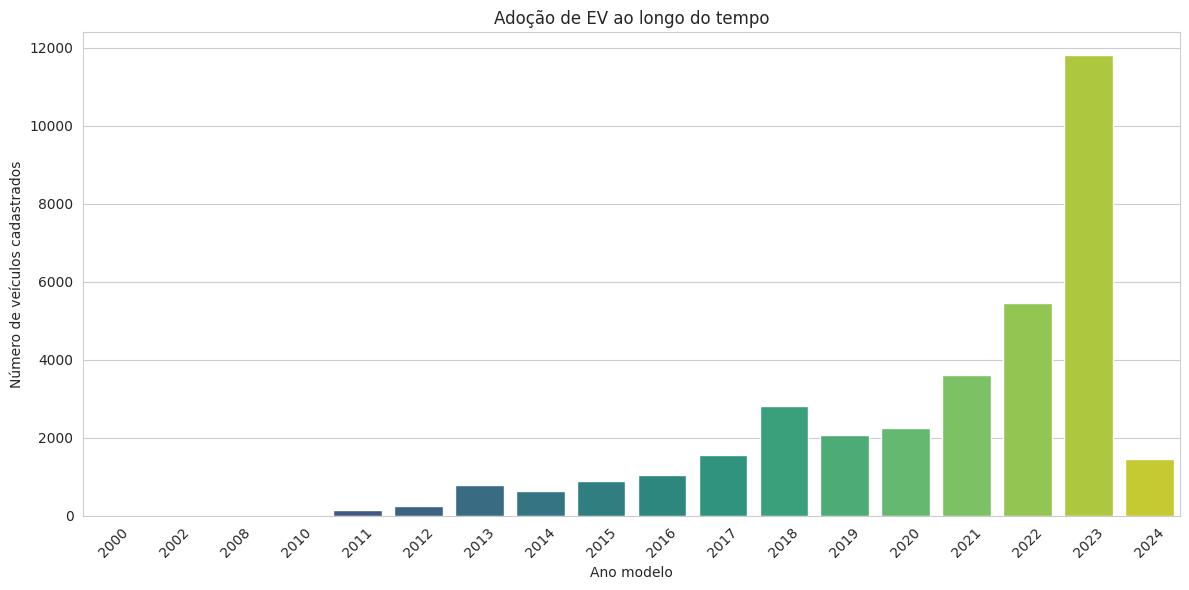

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Adoção de EV ao longo do tempo
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('Adoção de EV ao longo do tempo')
plt.xlabel('Ano modelo')
plt.ylabel('Número de veículos cadastrados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

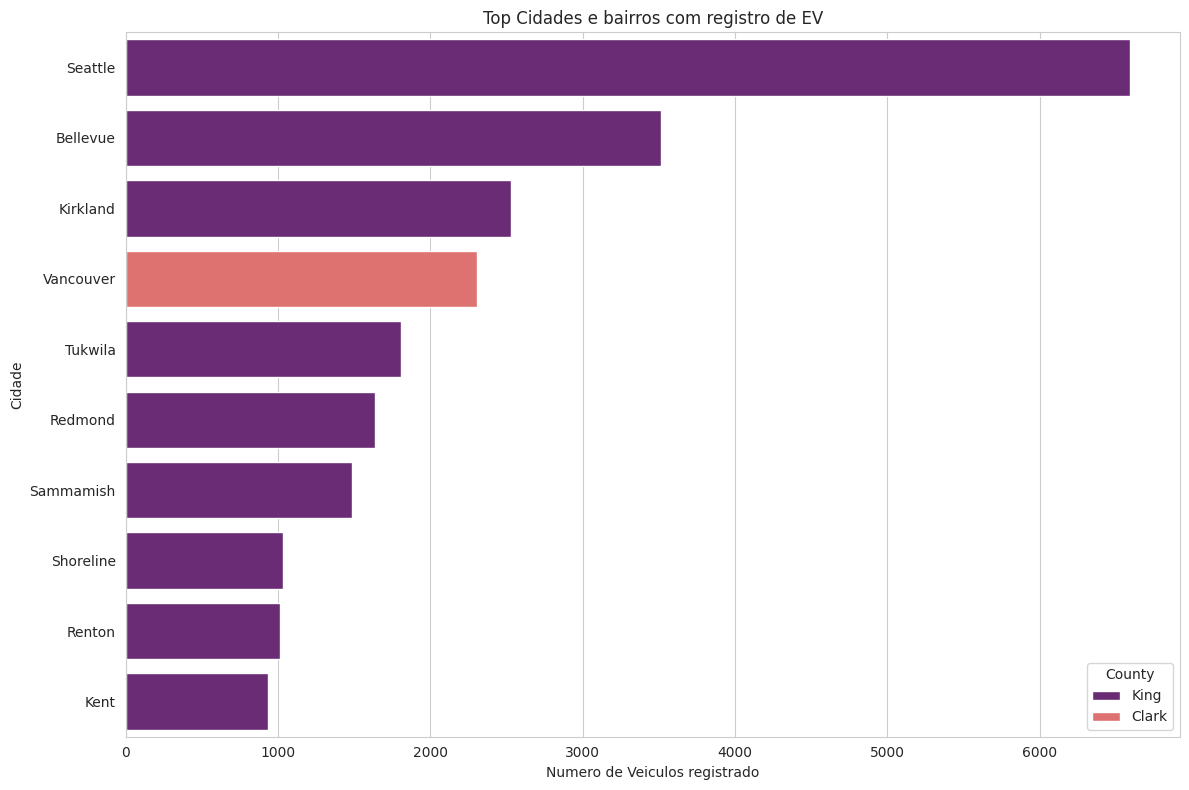

In [8]:
# distribuição geográfica
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtrando o conjunto de dados para esses principais cidades
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analisando a distribuição de VEs nas cidades
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize as 10 principais cidades
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cidades e bairros com registro de EV')
plt.xlabel('Numero de Veiculos registrado')
plt.ylabel('Cidade')
plt.legend(title='County')
plt.tight_layout()
plt.show()

<ipython-input-9-331beafe0188>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


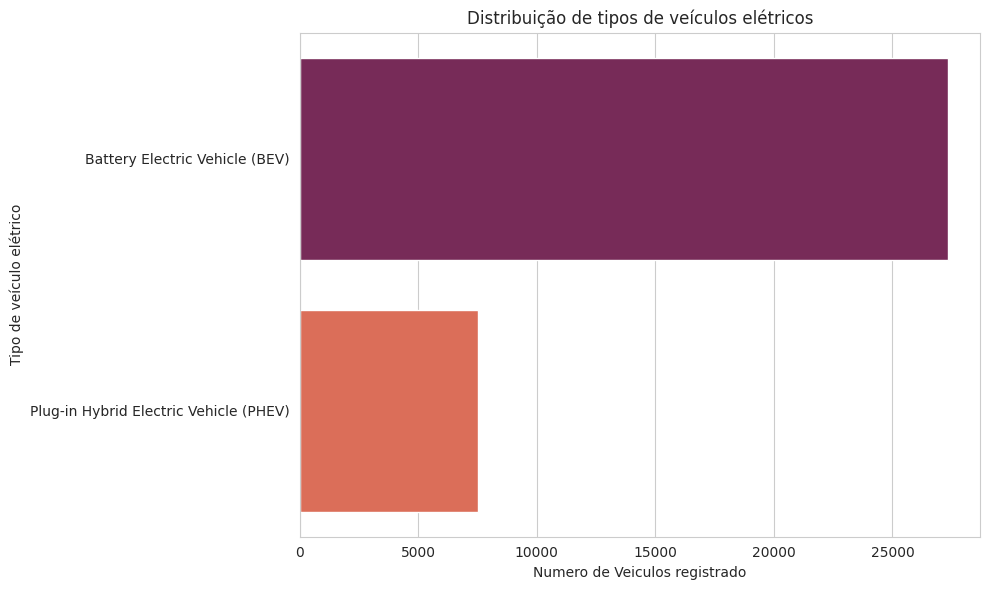

In [9]:
# analisando a distribuição de tipos de veículos elétricos
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribuição de tipos de veículos elétricos')
plt.xlabel('Numero de Veiculos registrado')
plt.ylabel('Tipo de veículo elétrico')
plt.tight_layout()
plt.show()

<ipython-input-10-9361ccba3b24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


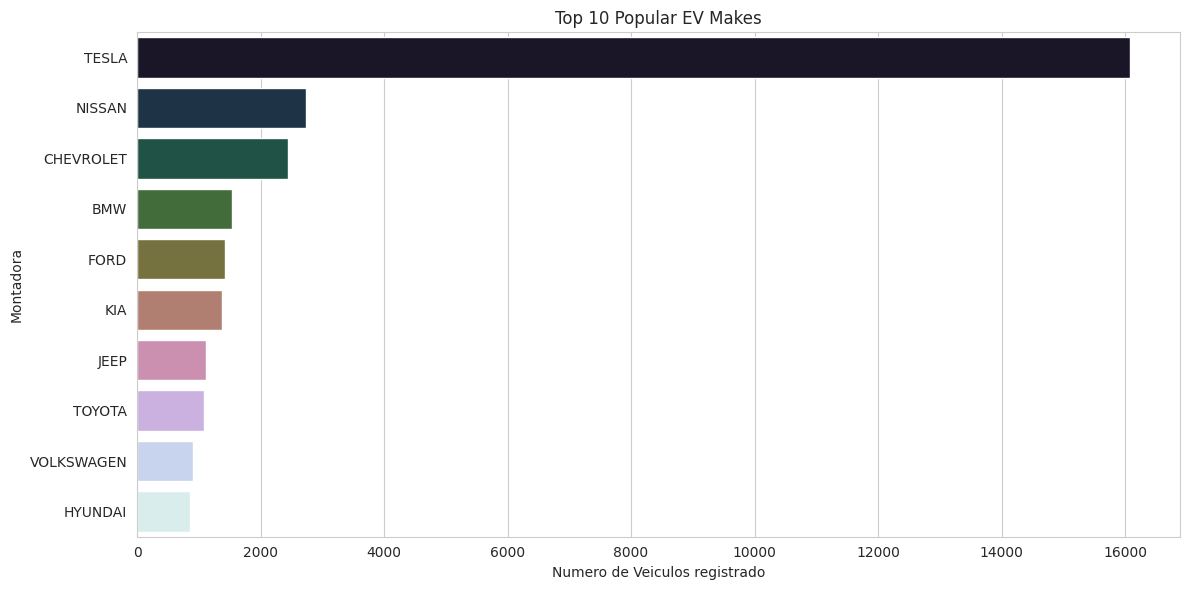

In [10]:
# analisando a popularidade dos fabricantes de EV
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limitando aos 10 primeiros para maior clareza

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Numero de Veiculos registrado')
plt.ylabel('Montadora')
plt.tight_layout()
plt.show()

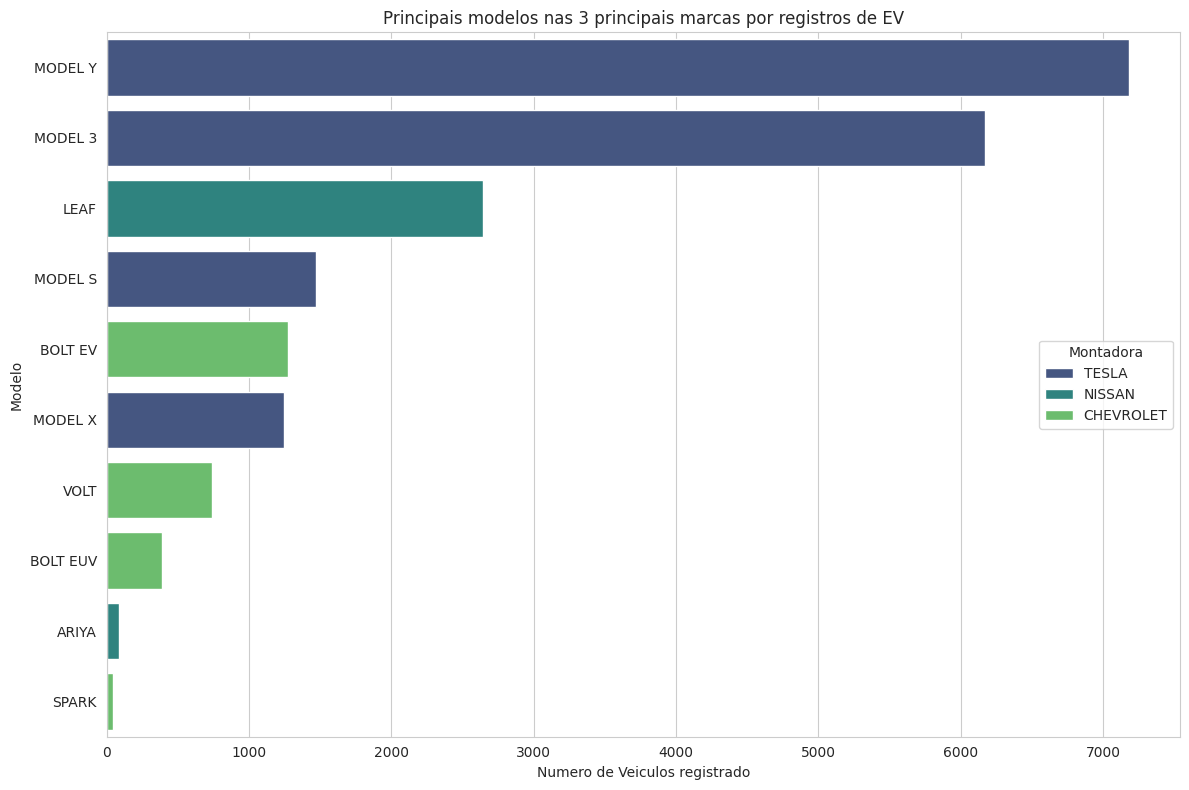

In [11]:
# selecionando os 3 principais fabricantes com base no número de veículos registrados
top_3_makes = ev_make_distribution.head(3).index

# filtrando o conjunto de dados para esses principais fabricantes
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analisando a popularidade dos modelos EV entre esses principais fabricantes
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


# visualizando os 10 principais modelos desses fabricantes para maior clareza
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Principais modelos nas 3 principais marcas por registros de EV')
plt.xlabel('Numero de Veiculos registrado')
plt.ylabel('Modelo')
plt.legend(title='Montadora', loc='center right')
plt.tight_layout()
plt.show()

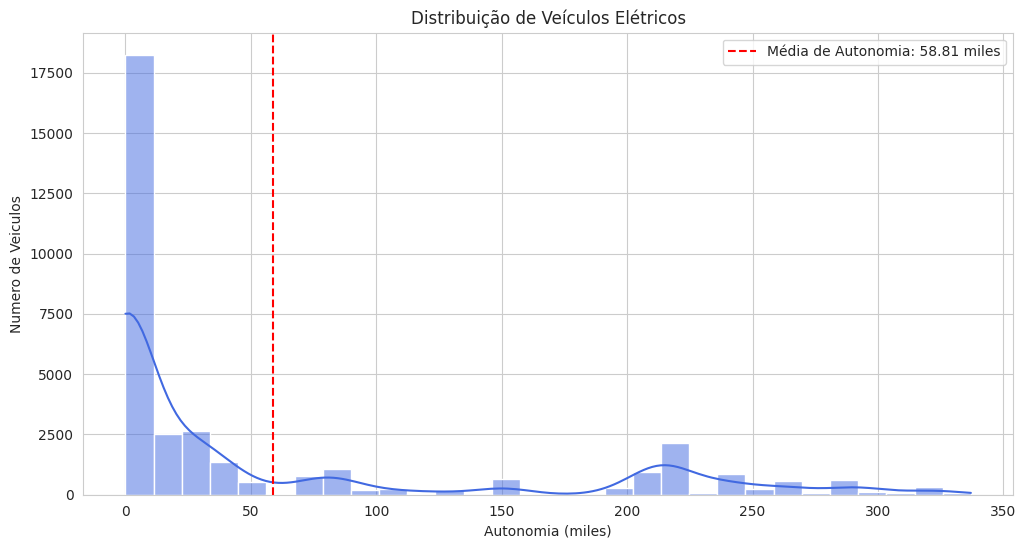

In [12]:

# analisando a distribuição da autonomia elétrica
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribuição de Veículos Elétricos')
plt.xlabel('Autonomia (miles)')
plt.ylabel('Numero de Veiculos')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Média de Autonomia: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

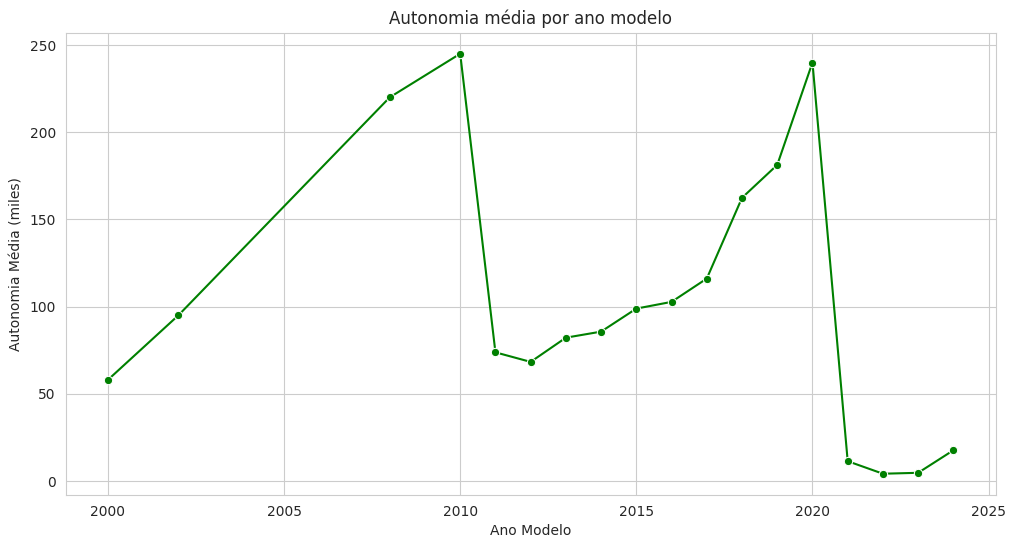

In [13]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Autonomia média por ano modelo')
plt.xlabel('Ano Modelo')
plt.ylabel('Autonomia Média (miles)')
plt.grid(True)
plt.show()

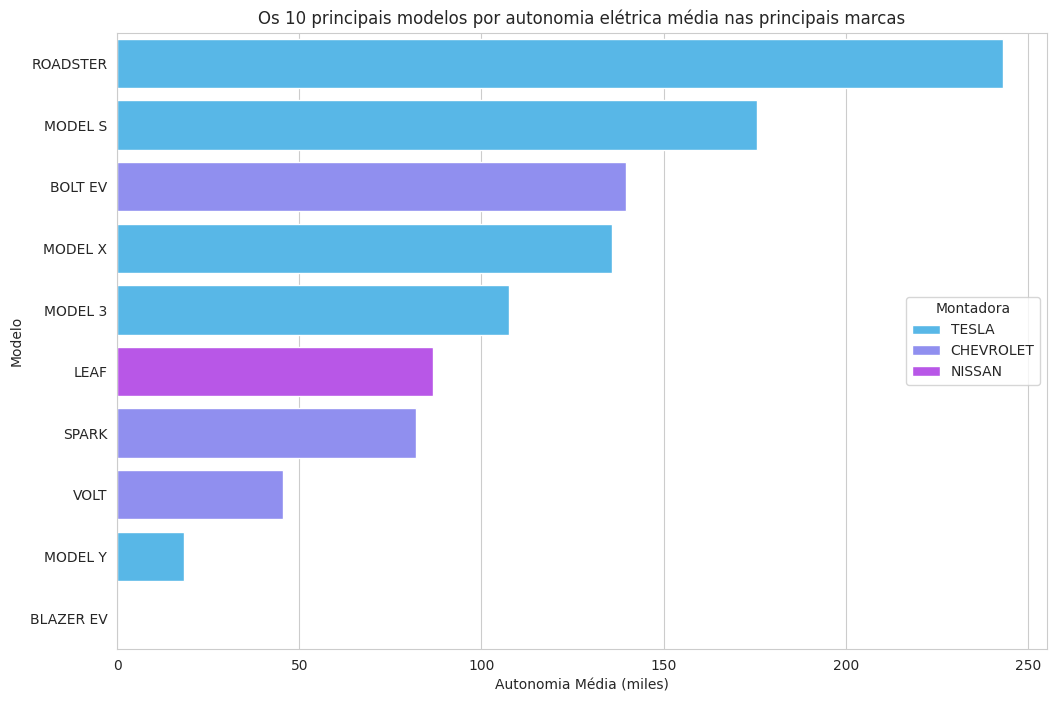

In [14]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Os 10 principais modelos por autonomia elétrica média nas principais marcas')
plt.xlabel('Autonomia Média (miles)')
plt.ylabel('Modelo')
plt.legend(title='Montadora', loc='center right')
plt.show()

In [15]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
2000        1
2002        1
2008        1
2010        9
2011      139
2012      263
2013      797
2014      634
2015      885
2016     1043
2017     1571
2018     2821
2019     2070
2020     2263
2021     3610
2022     5462
2023    11808
2024     1458
Name: count, dtype: int64

In [16]:
from scipy.optimize import curve_fit
import numpy as np

# filtra o conjunto de dados para incluir anos com dados completos, assumindo que 2023 é o último ano completo
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

#defina uma função para crescimento exponencial para ajustar os dados
def exp_growth(x, a, b):
    return a * np.exp(b * x)

#prepara os dados para ajuste de curva
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# ajusta os dados à função de crescimento exponencial
params, covariance = curve_fit(exp_growth, x_data, y_data)

# usa a função ajustada para prever o número de VEs para 2024 e os próximos cinco anos
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# cria um dicionário para exibir os valores previstos para facilitar a interpretação
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 17067.284039120557, 2025: 26904.00574111545, 2026: 42410.1176999729, 2027: 66853.17051419076, 2028: 105383.96614264317, 2029: 166121.96900364483}


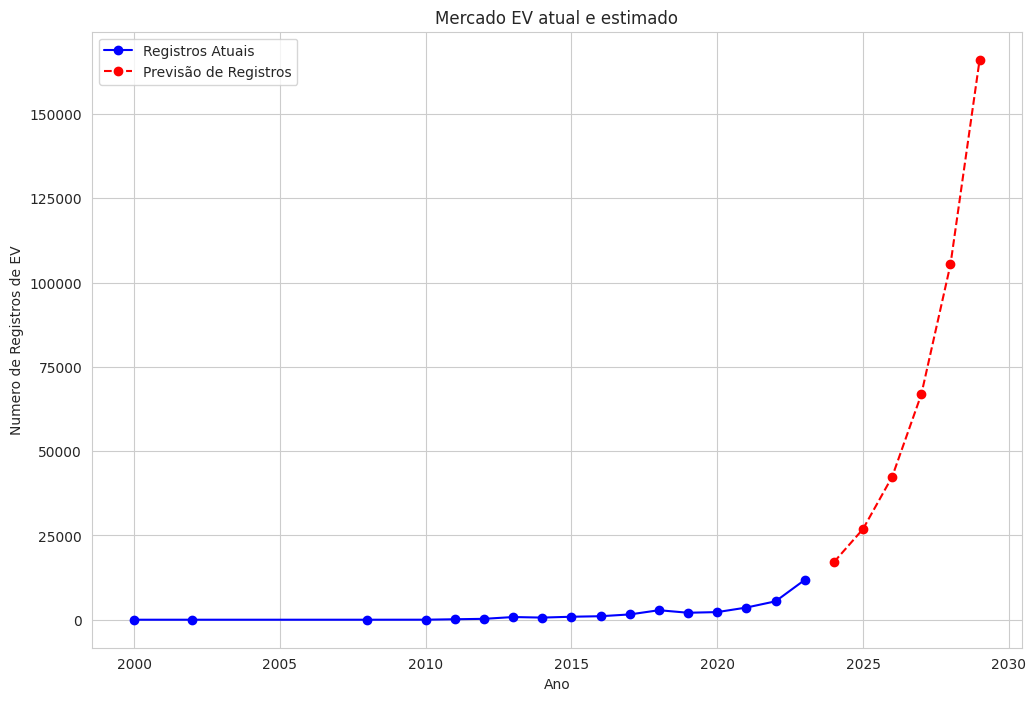

In [18]:
#prepara dados para plotagem
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# valores reais e previstos
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Registros Atuais')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Previsão de Registros')

plt.title('Mercado EV atual e estimado')
plt.xlabel('Ano')
plt.ylabel('Numero de Registros de EV')
plt.legend()
plt.grid(True)

plt.show()

# **Portanto, a análise do tamanho do mercado é um aspecto crucial da pesquisa de mercado que determina o volume potencial de vendas dentro de um determinado mercado. Ajuda as empresas a compreender a magnitude da procura, avaliar os níveis de saturação do mercado e identificar oportunidades de crescimento. A partir da nossa análise da dimensão do mercado de veículos eléctricos, encontrámos um futuro promissor para a indústria de veículos eléctricos, indicando uma mudança significativa nas preferências dos consumidores e um potencial aumento no investimento relacionado e nas oportunidades de negócio.**